In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./preprocessed_weatherAUS.csv")

In [3]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993,0.0,0.0
1,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,25.0,1010.6,1007.8,4.447461,4.50993,0.0,0.0
2,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,30.0,1007.6,1008.7,4.447461,2.00000,0.0,0.0
3,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,16.0,1017.6,1012.8,4.447461,4.50993,0.0,0.0
4,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.00000,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136653 entries, 0 to 136652
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       136653 non-null  int64  
 1   MinTemp        136653 non-null  float64
 2   MaxTemp        136653 non-null  float64
 3   Rainfall       136653 non-null  float64
 4   Evaporation    136653 non-null  float64
 5   Sunshine       136653 non-null  float64
 6   WindGustDir    136653 non-null  int64  
 7   WindGustSpeed  136653 non-null  float64
 8   WindDir9am     136653 non-null  int64  
 9   WindDir3pm     136653 non-null  int64  
 10  WindSpeed9am   136653 non-null  float64
 11  WindSpeed3pm   136653 non-null  float64
 12  Humidity3pm    136653 non-null  float64
 13  Pressure9am    136653 non-null  float64
 14  Pressure3pm    136653 non-null  float64
 15  Cloud9am       136653 non-null  float64
 16  Cloud3pm       136653 non-null  float64
 17  RainToday      136653 non-nul

In [5]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [6]:
X = df.loc[:, df.columns != "RainTomorrow"]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136653 entries, 0 to 136652
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       136653 non-null  int64  
 1   MinTemp        136653 non-null  float64
 2   MaxTemp        136653 non-null  float64
 3   Rainfall       136653 non-null  float64
 4   Evaporation    136653 non-null  float64
 5   Sunshine       136653 non-null  float64
 6   WindGustDir    136653 non-null  int64  
 7   WindGustSpeed  136653 non-null  float64
 8   WindDir9am     136653 non-null  int64  
 9   WindDir3pm     136653 non-null  int64  
 10  WindSpeed9am   136653 non-null  float64
 11  WindSpeed3pm   136653 non-null  float64
 12  Humidity3pm    136653 non-null  float64
 13  Pressure9am    136653 non-null  float64
 14  Pressure3pm    136653 non-null  float64
 15  Cloud9am       136653 non-null  float64
 16  Cloud3pm       136653 non-null  float64
 17  RainToday      136653 non-nul

In [8]:
y = df["RainTomorrow"]

In [9]:
y.unique()

array([0., 1.])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [13]:
os = SMOTE()
X_train, y_train = os.fit_resample(X_train, y_train)
count = Counter(y_train)
print(count)

Counter({0.0: 86876, 1.0: 86876})


In [14]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,28,11.900000,11.900000,0.000000,6.400000,10.900000,4,31.000000,1,5,17.000000,15.000000,19.000000,1022.000000,1019.400000,4.000000,5.000000,0.000000
1,8,27.200000,27.200000,0.000000,5.468232,7.611178,10,41.000000,10,10,6.000000,22.000000,78.000000,1009.800000,1007.400000,6.000000,3.000000,0.000000
2,36,10.200000,10.200000,9.800000,5.468232,7.611178,14,57.000000,3,14,17.000000,26.000000,74.000000,1017.649940,1015.255889,4.447461,4.509930,1.000000
3,12,15.800000,15.800000,0.200000,5.200000,8.200000,13,70.000000,3,12,19.000000,26.000000,85.000000,1004.100000,1004.400000,4.447461,4.509930,0.000000
4,37,20.500000,20.500000,0.000000,8.600000,1.500000,13,40.035230,0,0,15.000000,20.000000,54.000000,1017.500000,1016.900000,7.000000,7.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173747,37,15.724508,15.724508,3.996780,1.478712,0.921288,8,51.606439,11,8,21.180682,13.425757,89.180682,1017.154205,1015.962254,7.196780,7.000000,1.000000
173748,2,8.224419,8.224419,0.080680,4.592284,7.611178,2,25.193201,3,7,0.000000,13.000000,47.386402,1020.800000,1016.498300,5.373707,5.995507,0.000000
173749,31,21.467689,21.467689,0.309649,9.787135,7.109499,8,52.355272,5,1,13.064324,13.000000,31.032162,1013.887135,1008.967987,7.000000,1.967838,0.000000
173750,8,21.360510,21.360510,2.682547,3.407134,0.291465,8,37.448408,8,10,17.000000,13.448408,90.672612,1014.184331,1011.806751,7.775796,8.000000,0.775796


In [15]:
pset = gp.PrimitiveSetTyped("main", [type(X[col][0]) for col in X], bool, "IN")

In [16]:
import operator
import numpy
from functools import partial
import random

In [17]:
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.not_, [bool], bool)

# numpy.float64ing point operators
# Define a protected division function
def protectedDiv(left, right):
    try: return left / right
    except ZeroDivisionError: return 1

pset.addPrimitive(operator.add, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(operator.sub, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(operator.mul, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(protectedDiv, [numpy.float64,numpy.float64], numpy.float64)

# logic operators
# Define a new if-then-else function
def if_then_else(input, output1, output2):
    if input: return output1
    else: return output2

pset.addPrimitive(operator.lt, [numpy.float64, numpy.float64], bool)
pset.addPrimitive(operator.eq, [numpy.float64, numpy.float64], bool)
pset.addPrimitive(if_then_else, [bool, numpy.float64, numpy.float64], numpy.float64)

# terminals
pset.addEphemeralConstant("rand_norm", partial(numpy.float64, random.random()), numpy.float64)
pset.addTerminal(False, bool)
pset.addTerminal(True, bool)

In [18]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [19]:
from sklearn.metrics import f1_score

In [20]:
def evaluate(individulal):
    func = toolbox.compile(expr=individulal)
    y_pred = [func(*data) for _, data in X_train.iterrows()]
    return f1_score(y_train, y_pred),

In [21]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [22]:
pop = toolbox.population(n=100)

In [23]:
hof = tools.HallOfFame(1)

In [24]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [25]:
algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 40, stats, halloffame=hof)

gen	nevals	avg     	std     	min	max     
0  	100   	0.265259	0.314751	0  	0.686846
1  	56    	0.527678	0.256458	0  	0.686846
2  	64    	0.555326	0.24248 	0  	0.686846
3  	60    	0.606635	0.195527	0  	0.686846
4  	47    	0.644257	0.147321	0  	0.687832
5  	53    	0.669401	0.0947467	0  	0.686947
6  	67    	0.671542	0.0771994	2.30105e-05	0.691168
7  	62    	0.664357	0.104477 	0.00590227 	0.715881
8  	69    	0.673592	0.0804631	0.0158298  	0.715925
9  	67    	0.654465	0.129673 	0.0192034  	0.715925
10 	63    	0.669373	0.100937 	4.60077e-05	0.715925
11 	52    	0.654076	0.147507 	0          	0.715925
12 	56    	0.696557	0.0147177	0.614358   	0.715925
13 	63    	0.693554	0.0787458	2.30105e-05	0.716914
14 	62    	0.70293 	0.0718107	0          	0.718881
15 	58    	0.693824	0.105375 	0.0156727  	0.718881
16 	64    	0.702265	0.0665977	0.193826   	0.744492
17 	66    	0.697881	0.0815338	0.0156728  	0.744492
18 	52    	0.709894	0.0336343	0.425683   	0.744492
19 	68    	0.695153	0.104675 	0.112298   	

([[<deap.gp.Primitive at 0x151a86a70>,
 [{'gen': 0,
   'nevals': 100,
   'avg': 0.26525897126545606,
   'std': 0.3147507075126955,
   'min': 0.0,
   'max': 0.686845996128052},
  {'gen': 1,
   'nevals': 56,
   'avg': 0.5276780140727231,
   'std': 0.256458334440064,
   'min': 0.0,
   'max': 0.686845996128052},
  {'gen': 2,
   'nevals': 64,
   'avg': 0.5553257423615919,
   'std': 0.24248035372776702,
   'min': 0.0,
   'max': 0.686845996128052},
  {'gen': 3,
   'nevals': 60,
   'avg': 0.6066347025803352,
   'std': 0.19552664068148215,
   'min': 0.0,
   'max': 0.686845996128052},
  {'gen': 4,
   'nevals': 47,
   'avg': 0.6442570063254702,
   'std': 0.14732118230817667,
   'min': 0.0,
   'max': 0.6878321075591441},
  {'gen': 5,
   'nevals': 53,
   'avg': 0.6694013004487169,
   'std': 0.094746710424939,
   'min': 0.0,
   'max': 0.6869471466026318},
  {'gen': 6,
   'nevals': 67,
   'avg': 0.6715419530130562,
   'std': 0.07719935215980049,
   'min': 2.3010458253276117e-05,
   'max': 0.691167695

In [26]:
gp.graph(hof[0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96],
 [(0, 1),
  (1, 2),
  (1, 3),
  (3, 4),
  (3, 5),
  (5, 6),
  (6, 7),
  (7, 8),
  (8, 9),
  (8, 10),
  (7, 11),
  (11, 12),
  (11, 13),
  (6, 14),
  (6, 15),
  (5, 16),
  (16, 17),
  (16, 18),
  (1, 19),
  (19, 20),
  (20, 21),
  (20, 22),
  (19, 23),
  (23, 24),
  (23, 25),
  (25, 26),
  (26, 27),
  (26, 28),
  (28, 29),
  (29, 30),
  (30, 31),
  (30, 32),
  (29, 33),
  (28, 34),
  (34, 35),
  (34, 36),
  (25, 37),
  (37, 

In [27]:
import pygraphviz as pgv

In [28]:
nodes, edges, labels = gp.graph(hof[0])
g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

In [29]:
evaluate(hof[0])

(0.7523207852555736,)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [31]:
func = toolbox.compile(expr=hof[0])
y_pred = [func(*data) for _, data in X_test.iterrows()]

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.63      0.74     21627
         1.0       0.35      0.77      0.48      5704

    accuracy                           0.66     27331
   macro avg       0.63      0.70      0.61     27331
weighted avg       0.80      0.66      0.69     27331



In [33]:
accuracy_score(y_test, y_pred)

0.6566902052614247

In [34]:
y_train_pred = [func(*data) for _, data in X_train.iterrows()]

In [35]:
print(classification_report(y_pred=y_train_pred, y_true=y_train))

              precision    recall  f1-score   support

         0.0       0.79      0.62      0.70     86876
         1.0       0.69      0.83      0.75     86876

    accuracy                           0.73    173752
   macro avg       0.74      0.73      0.72    173752
weighted avg       0.74      0.73      0.72    173752



In [36]:
accuracy_score(y_train, y_train_pred)

0.7269786822597726

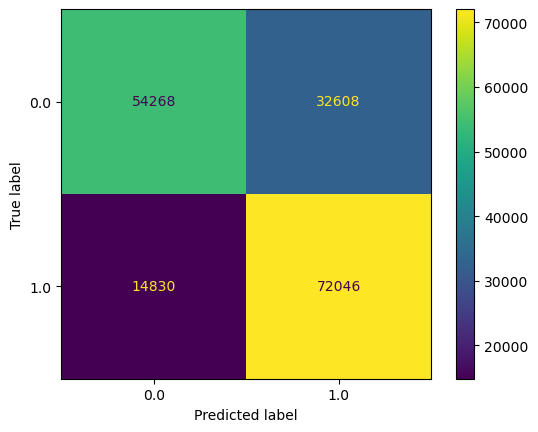

In [37]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

In [39]:
import pickle

In [42]:
with open("best_model.pkl", "wb") as file:
    pickle.dump(hof[0], file)